<a href="https://colab.research.google.com/github/danielsdliu/BMIG6201/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
missing_values=["?"]
#import ? as missing value
raw_data = pd.read_csv("https://github.com/horaciogacevedo/Bmig6201/raw/main/Tests/Auto.data", sep="\s+", na_values= missing_values)
auto = raw_data
#drop rows with missing values
auto = auto.dropna(axis=0)
#check for missing values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

1a. Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg containes a value below its median.

In [38]:
import statistics as st

def mpg_class(number):
    #median mpg = 23.0
    if number > st.median(auto["mpg"]):
        return 1
    else:
        return 0
    
auto["mpg01"] = auto["mpg"].apply(mpg_class)
auto

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,1


1b. Explore the data graphically in order to investigate the associate between mpg01 and the other features using scatterplots and boxplots. Describe your ﬁndings.

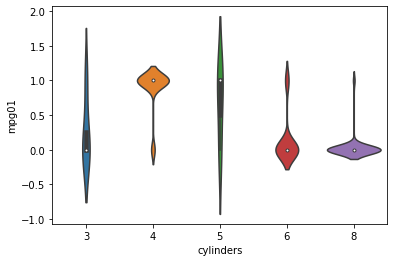

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt
cyls = sb.violinplot(x="cylinders", y="mpg01", data=auto)

Higher cylinders are more likely to below the median mpg. 3 and 5 cylinder cars are pretty rare compared to 4, 6, 8.

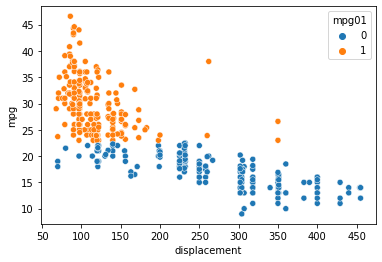

In [40]:
disp = sb.scatterplot(x="displacement", y="mpg", hue="mpg01", data=auto)

Smaller displacement is more likely to be below the median mpg

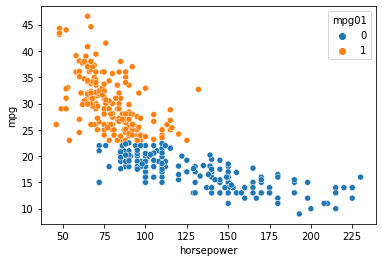

In [41]:
hp = sb.scatterplot(x="horsepower", y="mpg", hue="mpg01", data=auto)

If your under median mpg, you're more likely to have less horsepower.

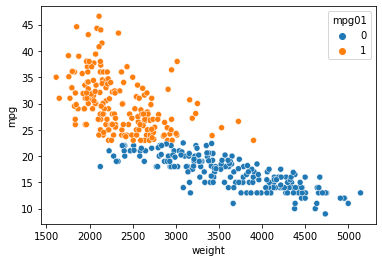

In [42]:
weight = sb.scatterplot(x="weight", y="mpg", hue="mpg01", data=auto)

the heavier the car, the worse the mpg.

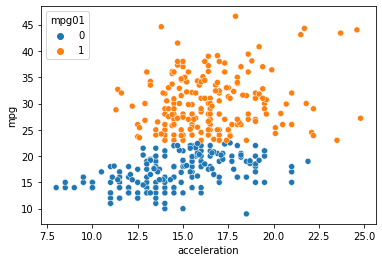

In [43]:
accel = sb.scatterplot(x="acceleration", y="mpg", hue="mpg01", data=auto)

The lower the acceleration, the worse your mpg (most likely related to weight)

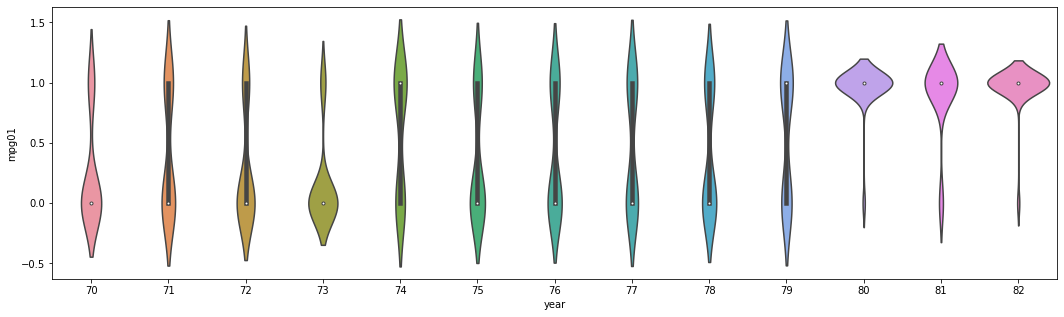

In [44]:
plt.figure(figsize=(18,5))
yr = sb.violinplot(x="year", y="mpg01", data=auto)

The mpg improved as the years went on.

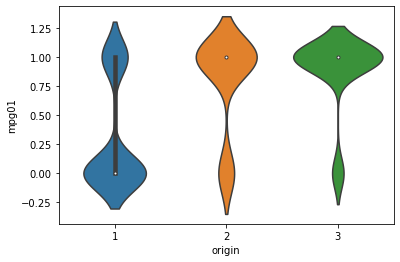

In [45]:
orig = sb.violinplot(x="origin", y="mpg01", data=auto)

Cars from regions 2 and 3 are more likely to have better mpg than region 1

1c. Split the data into a training set and a test set.

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = auto.drop(["mpg", "mpg01", "name"], axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled_b = X_scaled
y = auto["mpg01"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=7)

1d. Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01. Calculate the test error of the model obtained

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
log_reg = LogisticRegression(fit_intercept=True)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred=log_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.11392405063291139

1e. Fit a support vector classiﬁer to the data with various values of cost, in order to predict whether a car gets high or low gas milage. Report the cross-validation error associated with diﬀerent values of this parameter.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm_clf05 = Pipeline([("linear_svc", LinearSVC(C=0.5, max_iter=10000))])
svm_clf1 = Pipeline([("linear_svc", LinearSVC(C=1, max_iter=10000))])
svm_clf2 = Pipeline([("linear_svc", LinearSVC(C=2, max_iter=10000))])
svm_clf25 = Pipeline([("linear_svc", LinearSVC(C=0.25, max_iter=10000))])

svm_clf05.fit(X_train,y_train)
svm_clf1.fit(X_train,y_train)
svm_clf2.fit(X_train,y_train)
svm_clf25.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('linear_svc',
                 LinearSVC(C=0.25, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=10000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [50]:
from sklearn.model_selection import cross_val_score

score05 = cross_val_score(svm_clf05, X_train, y_train, cv=5)
score1 = cross_val_score(svm_clf1, X_train, y_train, cv=5)
score2 = cross_val_score(svm_clf2, X_train, y_train, cv=5)
score25 = cross_val_score(svm_clf25, X_train, y_train, cv=5)

In [51]:
print("c = 0.5: accuracy: %0.3f stdev: %0.3f \nc = 1: accuracy: %0.3f stdev: %0.3f \nc = 2: accuracy: %0.3f stdev: %0.3f \nc = 0.25: accuracy: %0.3f stdev: %0.3f " 
      % (score05.mean(), score05.std(), score1.mean(), score1.std(), score2.mean(), score2.std(), score25.mean(), score25.std()))

c = 0.5: accuracy: 0.904 stdev: 0.028 
c = 1: accuracy: 0.904 stdev: 0.028 
c = 2: accuracy: 0.904 stdev: 0.028 
c = 0.25: accuracy: 0.911 stdev: 0.024 


1f. Repeat the previous item but this time using SVMs with radial and polynomial basis kernels with diﬀerent values of gamma and degree and costs.

In [57]:
from sklearn.svm import SVC

svm_poly1_3 = SVC(kernel="poly", degree=3, gamma="scale", C = 1)
svm_poly2_3 = SVC(kernel="poly", degree=3, gamma="scale", C = 2)
svm_poly25_3 = SVC(kernel="poly", degree=3, gamma="scale", C = 0.25)
svm_poly1_3_g = SVC(kernel="poly", degree=3, gamma="auto", C = 1)
svm_poly1_2 = SVC(kernel="poly", degree=2, gamma="scale", C = 1)
svm_rbf1 = SVC(kernel="rbf", gamma="scale", C = 1)
svm_rbf2 = SVC(kernel="rbf", gamma="scale", C = 2)
svm_rbf25 = SVC(kernel="rbf", gamma="scale", C = 0.25)
svm_rbf1_g = SVC(kernel="rbf", gamma="auto", C = 1)


svm_poly1_3.fit(X_train,y_train)
svm_poly2_3.fit(X_train,y_train)
svm_poly25_3.fit(X_train,y_train)
svm_poly1_3_g.fit(X_train,y_train)
svm_poly1_2.fit(X_train,y_train)
svm_rbf1.fit(X_train,y_train)
svm_rbf2.fit(X_train,y_train)
svm_rbf25.fit(X_train,y_train)
svm_rbf1_g.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score

scorep13 = cross_val_score(svm_poly1_3, X_train, y_train, cv=5)
scorep23 = cross_val_score(svm_poly2_3, X_train, y_train, cv=5)
scorep253 = cross_val_score(svm_poly25_3, X_train, y_train, cv=5)
scorep13g = cross_val_score(svm_poly1_3_g, X_train, y_train, cv=5)
scorep12 = cross_val_score(svm_poly1_2, X_train, y_train, cv=5)
scorer1 = cross_val_score(svm_rbf1, X_train, y_train, cv=5)
scorer2 = cross_val_score(svm_rbf2, X_train, y_train, cv=5)
scorer25 = cross_val_score(svm_rbf25, X_train, y_train, cv=5)
scorer1g = cross_val_score(svm_rbf1_g, X_train, y_train, cv=5)

In [58]:
print("c = 1, degree = 3, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorep13.mean(), scorep13.std()))
print("c = 2, degree = 3, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorep23.mean(), scorep23.std()))
print("c = 0.25, degree = 3, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorep253.mean(), scorep253.std()))
print("c = 1, degree = 3, gamma = auto: accuracy: %0.3f stdev: %0.3f" % (scorep13g.mean(), scorep13g.std()))
print("c = 1, degree = 2, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorep12.mean(), scorep12.std()))
print("c = 1, rbf, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorer1.mean(), scorer1.std()))
print("c = 2, rbf, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorer2.mean(), scorer2.std()))
print("c = 0.25, rbf, gamma = scale: accuracy: %0.3f stdev: %0.3f" % (scorer25.mean(), scorer25.std()))
print("c = 1, rbf, gamma = auto: accuracy: %0.3f stdev: %0.3f" % (scorer1g.mean(), scorer1g.std()))

c = 1, degree = 3, gamma = scale: accuracy: 0.888 stdev: 0.028
c = 2, degree = 3, gamma = scale: accuracy: 0.891 stdev: 0.029
c = 0.25, degree = 3, gamma = scale: accuracy: 0.901 stdev: 0.027
c = 1, degree = 3, gamma = auto: accuracy: 0.891 stdev: 0.031
c = 1, degree = 2, gamma = scale: accuracy: 0.796 stdev: 0.026
c = 1, rbf, gamma = scale: accuracy: 0.920 stdev: 0.030
c = 2, rbf, gamma = scale: accuracy: 0.917 stdev: 0.034
c = 0.25, rbf, gamma = scale: accuracy: 0.907 stdev: 0.032
c = 1, rbf, gamma = auto: accuracy: 0.920 stdev: 0.030


2. Using the College data set, provide a solution for the following questions

   (a) Split the data set into a training set and a test set.

In [68]:
data2 = pd.read_csv("https://github.com/horaciogacevedo/Bmig6201/raw/main/Tests/College.csv", index_col=[0])
college = data2
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [69]:
college.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

def private_code(string):
  if string == "Yes":
    return 1
  else:
    return 0

college["Private_Code"] = college["Private"].apply(private_code)
college


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Code
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [83]:
X1 = college.drop(["Apps","Private"], axis=1)
scaler = preprocessing.StandardScaler().fit(X1)
X_scaled1 = scaler.transform(X1)
y1 = college["Apps"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size = 0.2, random_state=10)

2b. Fit a linear model using least squares on the training set and report
the test error obtained.

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
logreg = LogisticRegression(fit_intercept=True, max_iter=1000)
logreg.fit(X_train1, y_train1)

y_pred1=logreg.predict(X_test1)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test1, y_pred1)

3172719.2115384615